In [1]:
!pip install tweepy textblob nltk streamlit pandas plotly


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import random
import time
import pandas as pd
import plotly.express as px
from textblob import TextBlob
from datetime import datetime
from IPython.display import clear_output


In [3]:
tweets = [
    "I love this new phone! The camera is awesome 📱😍",
    "The service was terrible, I’ll never come back again 😡",
    "It’s an average experience, nothing special 🤷‍♀️",
    "Wow! What an amazing day! ☀️",
    "I hate waiting so long for deliveries 😤",
    "The update is okay, not too good not too bad.",
    "Customer support was very helpful and kind 🙌",
    "Worst product I’ve ever used 👎",
    "Totally satisfied with the product ❤️",
    "It could have been better..."
]


In [4]:
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"


In [5]:
for i in range(5):
    tweet = random.choice(tweets)
    sentiment = get_sentiment(tweet)
    current_time = datetime.now().strftime("%H:%M:%S")

    print(f"🕒 {current_time} | Tweet: {tweet}")
    print(f"Sentiment: {sentiment}")
    print("-" * 60)
    time.sleep(2)


🕒 17:35:41 | Tweet: I hate waiting so long for deliveries 😤
Sentiment: Negative
------------------------------------------------------------
🕒 17:35:43 | Tweet: Worst product I’ve ever used 👎
Sentiment: Negative
------------------------------------------------------------
🕒 17:35:45 | Tweet: Totally satisfied with the product ❤️
Sentiment: Positive
------------------------------------------------------------
🕒 17:35:47 | Tweet: It could have been better...
Sentiment: Positive
------------------------------------------------------------
🕒 17:35:49 | Tweet: Worst product I’ve ever used 👎
Sentiment: Negative
------------------------------------------------------------


In [6]:
data = []

for i in range(15):  # simulate 15 tweets
    tweet = random.choice(tweets)
    sentiment = get_sentiment(tweet)
    current_time = datetime.now().strftime("%H:%M:%S")
    
    data.append({'Time': current_time, 'Tweet': tweet, 'Sentiment': sentiment})
    df = pd.DataFrame(data)
    
    clear_output(wait=True)  # clears previous output to look live
    display(df.tail(5))  # show last 5 tweets only
    
    time.sleep(1)


,Time,Tweet,Sentiment
10,17:36:22,Wow! What an amazing day! ☀️,Positive
11,17:36:23,Customer support was very helpful and kind 🙌,Positive
12,17:36:24,Customer support was very helpful and kind 🙌,Positive
13,17:36:25,"It’s an average experience, nothing special 🤷‍♀️",Positive
14,17:36:26,Worst product I’ve ever used 👎,Negative


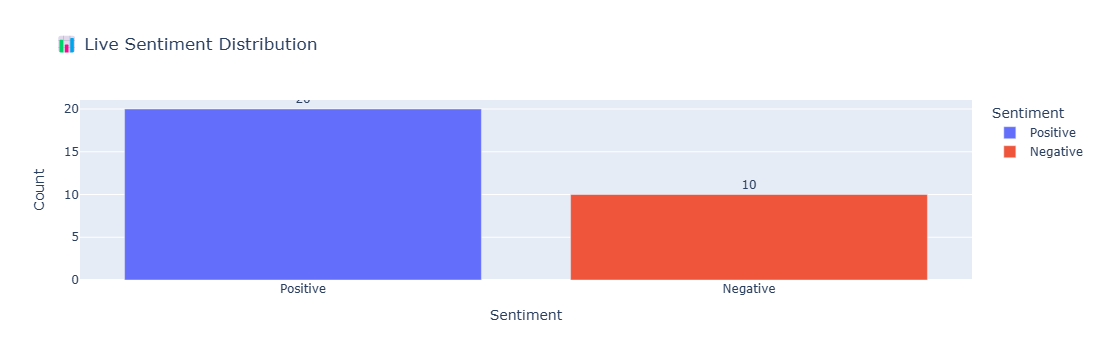

In [8]:
data = []

for i in range(30):
    tweet = random.choice(tweets)
    sentiment = get_sentiment(tweet)
    current_time = datetime.now().strftime("%H:%M:%S")
    data.append({'Time': current_time, 'Tweet': tweet, 'Sentiment': sentiment})
    df = pd.DataFrame(data)

    clear_output(wait=True)

    # Create the value count DataFrame
    sentiment_count = df['Sentiment'].value_counts().reset_index()
    sentiment_count.columns = ['Sentiment', 'Count']  # rename columns properly

    # Create bar chart
    fig = px.bar(sentiment_count,
                 x='Sentiment', y='Count',
                 color='Sentiment',
                 title='📊 Live Sentiment Distribution',
                 text='Count')

    fig.update_traces(textposition='outside')
    fig.show()

    time.sleep(1)


🕒 Latest Tweet: Totally satisfied with the product ❤️
Sentiment: Positive
------------------------------------------------------------
Total Tweets Analyzed: 30
😊 Positive: 24 (80.0%)
😐 Neutral : 0 (0.0%)
😡 Negative: 6 (20.0%)


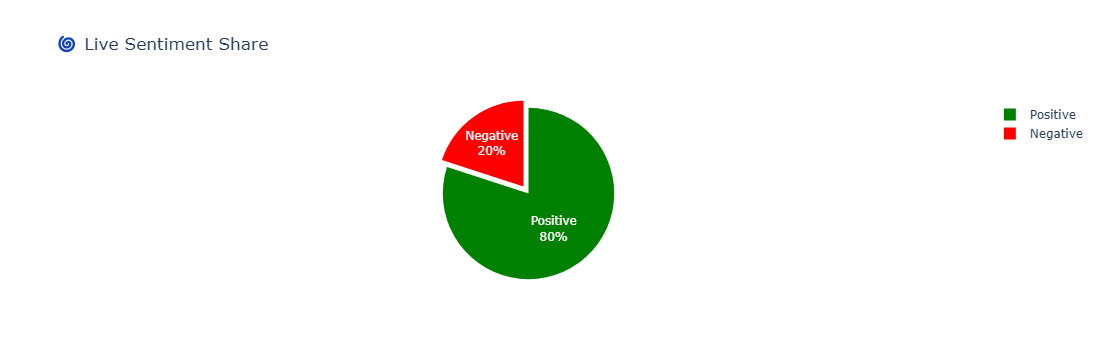

In [9]:
# Enhanced Real-Time Sentiment Dashboard

data = []

for i in range(30):  # simulate 30 live tweets
    tweet = random.choice(tweets)
    sentiment = get_sentiment(tweet)
    current_time = datetime.now().strftime("%H:%M:%S")

    data.append({'Time': current_time, 'Tweet': tweet, 'Sentiment': sentiment})
    df = pd.DataFrame(data)

    clear_output(wait=True)

    # ----- Sentiment Count -----
    sentiment_count = df['Sentiment'].value_counts().reset_index()
    sentiment_count.columns = ['Sentiment', 'Count']

    # ----- Sentiment Percentage -----
    total = len(df)
    pos = len(df[df['Sentiment'] == 'Positive'])
    neg = len(df[df['Sentiment'] == 'Negative'])
    neu = len(df[df['Sentiment'] == 'Neutral'])

    pos_pct = (pos / total) * 100
    neg_pct = (neg / total) * 100
    neu_pct = (neu / total) * 100

    # ----- Print Live Text Summary -----
    print("🕒 Latest Tweet:", tweet)
    print(f"Sentiment: {sentiment}")
    print("-" * 60)
    print(f"Total Tweets Analyzed: {total}")
    print(f"😊 Positive: {pos} ({pos_pct:.1f}%)")
    print(f"😐 Neutral : {neu} ({neu_pct:.1f}%)")
    print(f"😡 Negative: {neg} ({neg_pct:.1f}%)")
    print("=" * 60)

    # ----- Create Pie Chart -----
    fig = px.pie(sentiment_count, names='Sentiment', values='Count',
                 title='🌀 Live Sentiment Share',
                 color='Sentiment',
                 color_discrete_map={'Positive': 'green',
                                     'Negative': 'red',
                                     'Neutral': 'gold'})

    fig.update_traces(textinfo='label+percent', pull=[0.05, 0.05, 0.05])
    fig.show()

    time.sleep(1)


In [10]:
API_KEY = "your_api_key_here"
API_SECRET = "your_api_secret_here"
BEARER_TOKEN = "your_bearer_token_here"

print("✅ Keys added successfully!")


✅ Keys added successfully!


In [11]:
!pip install tweepy



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import tweepy

API_KEY = "ouOfDTfpoxszrrFGdcRWjWZf0"
API_SECRET = "MNVddmAGM6mkGU0hUL82JnHLK4c5oyCx5pRfw0vNdVUsHCGtx5"
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAALWd5AEAAAAAf6vYiAsObTcaGvC4yyH6JOXl7t03DqY8qunAmYS8jN3qtYPQzFCmkArBf9QHOWDkjIStgAgMrjtWowj"

client = tweepy.Client(bearer_token=BEARER_TOKEN)

print("✅ Connected to X API successfully!")


✅ Connected to X API successfully!


In [17]:
# Fetch recent tweets using Tweepy Client

import tweepy

# Authentication (use the same tokens as before)
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAALWd5AEAAAAAIrqS%2FS4KOvNF9GBhHgRDG2d77%2Bc%3DtnlbRw5QtAzLbv8oPYpxUorilEVtT8jbXQ6LhmI5dSy3w1p5vV"

client = tweepy.Client(bearer_token=BEARER_TOKEN)

# Define your search query (you can change the keyword)
query = "Artificial Intelligence -is:retweet lang:en"

# Fetch the 10 most recent tweets
tweets = client.search_recent_tweets(query=query, max_results=10)

# Display each tweet
for tweet in tweets.data:
    print(tweet.text)
    print("-" * 100)


This Halloween,AI rises 🔮
The Oracle Witch has already glimpsed the future ⚡
Every campaign, every trend written in her crystal ball 🤖
Ignore her… if you dare 👻💀

https://t.co/XYcioxCogJ

#artificial_intelligence #Halloween2025 #campaign #DigitalMarketing  #HalloweenVibes https://t.co/r3hQpr3wdD
----------------------------------------------------------------------------------------------------
@WizMotive @Kindred_AI @KaitoAI Artificial intelligence is next Gen
----------------------------------------------------------------------------------------------------
Today, we look at The Trillion-Dollar Thought Machine.
Why OpenAI’s IPO Could Redefine Capitalism (or Pop It)

A $1 trillion valuation for a company still figuring out profits? Welcome to the new religion of intelligence — artificial or not.

(Expand to read it all)

Somewhere https://t.co/1qB9fHhuTZ
----------------------------------------------------------------------------------------------------
ICE Is Now Wandering the Stree

In [18]:
!pip install textblob



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from textblob import TextBlob
import pandas as pd

# Let's say you already have your fetched tweets stored like this:
tweets_list = [
    "This Halloween, AI rises 🔮 The Oracle Witch has already glimpsed the future ⚡",
    "Artificial intelligence is next Gen",
    "Why OpenAI’s IPO Could Redefine Capitalism",
    "ICE Is Now Wandering the Streets, Scanning People's Faces",
    "We got an artificial psychopath intelligence before general intelligence."
]

# Perform sentiment analysis
data = []
for tweet in tweets_list:
    blob = TextBlob(tweet)
    sentiment_score = blob.sentiment.polarity  # -1 (negative) to +1 (positive)
    
    if sentiment_score > 0:
        sentiment = "Positive"
    elif sentiment_score < 0:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    
    data.append({"Tweet": tweet, "Sentiment": sentiment, "Score": sentiment_score})

# Convert to DataFrame
df = pd.DataFrame(data)
print(df)


                                               Tweet Sentiment  Score
0  This Halloween, AI rises 🔮 The Oracle Witch ha...   Neutral  0.000
1                Artificial intelligence is next Gen  Negative -0.300
2         Why OpenAI’s IPO Could Redefine Capitalism   Neutral  0.000
3  ICE Is Now Wandering the Streets, Scanning Peo...   Neutral  0.000
4  We got an artificial psychopath intelligence b...  Negative -0.275


                                               Tweet Sentiment     Score
0             AI is amazing and helps humanity grow!  Positive  0.750000
1                   I hate how AI is replacing jobs!  Negative -1.000000
2                AI is just a tool, not good or bad.  Negative -0.525000
3  Artificial Intelligence is revolutionizing the...  Negative -0.157955
4            AI technology is terrible when misused!  Negative -1.000000
5             I love how AI makes everything faster!  Positive  0.625000


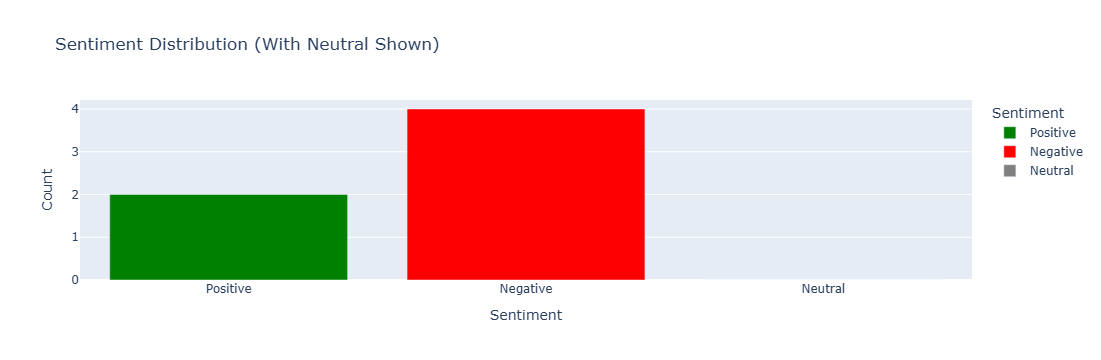

In [23]:
import pandas as pd
import plotly.express as px
from textblob import TextBlob

# Example tweets
tweets_list = [
    "AI is amazing and helps humanity grow!",
    "I hate how AI is replacing jobs!",
    "AI is just a tool, not good or bad.",
    "Artificial Intelligence is revolutionizing the world positively!",
    "AI technology is terrible when misused!",
    "I love how AI makes everything faster!",
]

# Sentiment calculation
data = []
for tweet in tweets_list:
    blob = TextBlob(tweet)
    score = blob.sentiment.polarity
    if score > 0.1:
        sentiment = "Positive"
    elif score < -0.1:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    data.append({"Tweet": tweet, "Sentiment": sentiment, "Score": score})

df = pd.DataFrame(data)
print(df)

# ✅ Ensure all sentiment categories appear
all_sentiments = ["Positive", "Negative", "Neutral"]
sentiment_counts = df['Sentiment'].value_counts().reindex(all_sentiments, fill_value=0).reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

# Graph
fig = px.bar(sentiment_counts, x='Sentiment', y='Count',
             title='Sentiment Distribution (With Neutral Shown)',
             color='Sentiment',
             color_discrete_map={"Positive": "green", "Negative": "red", "Neutral": "gray"})
fig.show()


In [24]:
pip install tweepy textblob pandas plotly


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import tweepy
import pandas as pd
from textblob import TextBlob
import plotly.express as px


In [26]:
# Twitter API v2 Bearer Token
bearer_token = "AAAAAAAAAAAAAAAAAAAAALWd5AEAAAAAIrqS%2FS4KOvNF9GBhHgRDG2d77%2Bc%3DtnlbRw5QtAzLbv8oPYpxUorilEVtT8jbXQ6LhmI5dSy3w1p5vV"

# Authenticate
client = tweepy.Client(bearer_token=bearer_token)


In [29]:
from textblob import TextBlob

# Apply sentiment analysis
df['Sentiment'] = df['Tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorize the sentiment
df['Sentiment'] = df['Sentiment'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

df.head()


,Tweet,Sentiment,Score
0,AI is amazing and helps humanity grow!,Positive,0.750000
1,I hate how AI is replacing jobs!,Negative,-1.000000
2,"AI is just a tool, not good or bad.",Negative,-0.525000
3,Artificial Intelligence is revolutionizing the...,Negative,-0.157955
4,AI technology is terrible when misused!,Negative,-1.000000


KeyError: 'Polarity'

In [31]:
print(df.columns)


Index(['Tweet', 'Sentiment', 'Score'], dtype='object')


In [34]:
# Convert numeric sentiment scores into sentiment labels
df['Sentiment'] = df['score'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

# Show categorized output
print(df[['Tweet', 'score', 'Sentiment']].head(10))
print("\nSentiment Counts:")
print(df['Sentiment'].value_counts())


KeyError: 'score'

In [33]:
print(df.columns)


Index(['Tweet', 'Sentiment', 'Score'], dtype='object')


In [35]:
df['Sentiment'] = df['Score'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)


In [36]:
print(df[['Tweet', 'Sentiment']].head(10))


                                               Tweet Sentiment
0             AI is amazing and helps humanity grow!  Positive
1                   I hate how AI is replacing jobs!  Negative
2                AI is just a tool, not good or bad.  Negative
3  Artificial Intelligence is revolutionizing the...  Negative
4            AI technology is terrible when misused!  Negative
5             I love how AI makes everything faster!  Positive


In [37]:
print(df.columns)


Index(['Tweet', 'Sentiment', 'Score'], dtype='object')


In [38]:
df['Sentiment'] = df['Score'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

print(df[['Tweet', 'Score', 'Sentiment']].head(10))


                                               Tweet     Score Sentiment
0             AI is amazing and helps humanity grow!  0.750000  Positive
1                   I hate how AI is replacing jobs! -1.000000  Negative
2                AI is just a tool, not good or bad. -0.525000  Negative
3  Artificial Intelligence is revolutionizing the... -0.157955  Negative
4            AI technology is terrible when misused! -1.000000  Negative
5             I love how AI makes everything faster!  0.625000  Positive


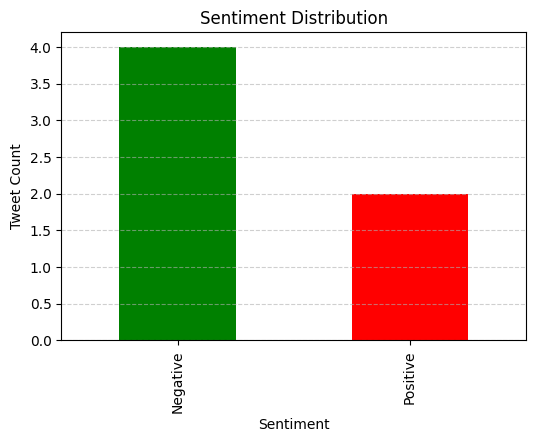

In [39]:
import matplotlib.pyplot as plt

# Count each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Bar chart
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


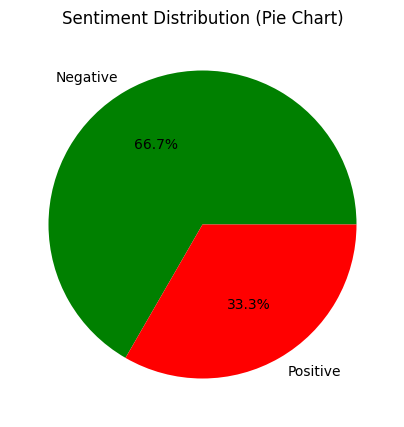

In [40]:
# Pie chart
plt.figure(figsize=(5,5))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red', 'gray'])
plt.title('Sentiment Distribution (Pie Chart)')
plt.ylabel('')
plt.show()


In [41]:
# Calculate average sentiment score
average_score = df['Score'].mean()
print(f"Average Sentiment Score: {average_score:.2f}")

# Interpret
if average_score > 0:
    print("Overall Sentiment: Positive 😊")
elif average_score < 0:
    print("Overall Sentiment: Negative 😠")
else:
    print("Overall Sentiment: Neutral 😐")


Average Sentiment Score: -0.22
Overall Sentiment: Negative 😠


In [42]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


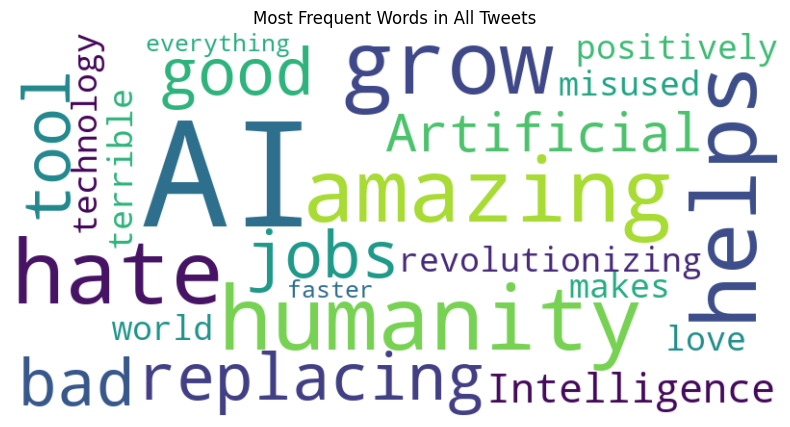

In [43]:
from wordcloud import WordCloud

# Combine all tweets into one big text
all_text = ' '.join(df['Tweet'])

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in All Tweets')
plt.show()


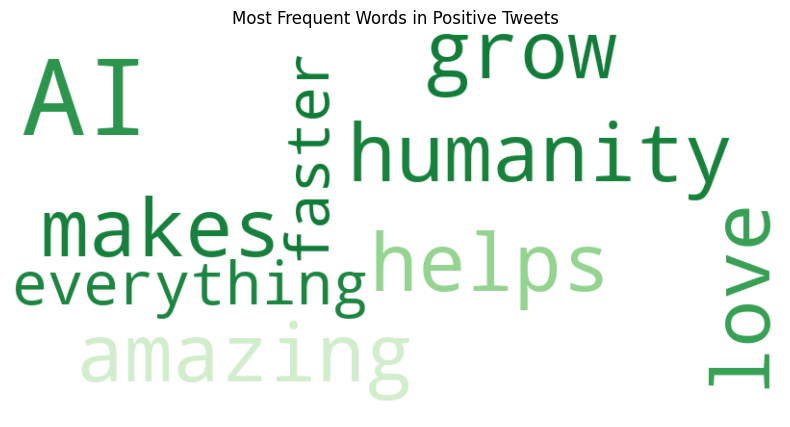

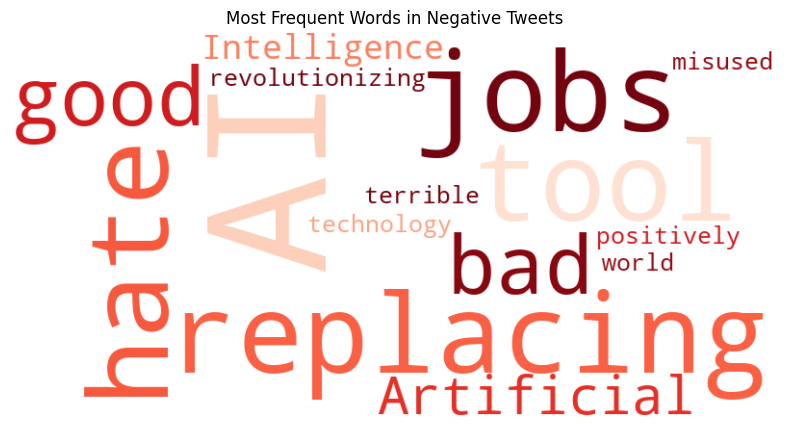

In [44]:
# WordCloud for Positive Tweets
positive_text = ' '.join(df[df['Sentiment'] == 'Positive']['Tweet'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Positive Tweets')
plt.show()

# WordCloud for Negative Tweets
negative_text = ' '.join(df[df['Sentiment'] == 'Negative']['Tweet'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Negative Tweets')
plt.show()


In [45]:
# Save analyzed data to CSV
df.to_csv("AI_Tweet_Sentiment_Analysis.csv", index=False)
print("✅ Data saved as 'AI_Tweet_Sentiment_Analysis.csv'")


✅ Data saved as 'AI_Tweet_Sentiment_Analysis.csv'


In [46]:
# Sentiment distribution
print("Sentiment Distribution:")
print(df['Sentiment'].value_counts())

# Average sentiment score
avg_score = df['Score'].mean()
print(f"\nAverage Sentiment Score: {avg_score:.2f}")

# Determine overall sentiment
if avg_score > 0:
    overall_sentiment = "Positive 😀"
elif avg_score < 0:
    overall_sentiment = "Negative 😠"
else:
    overall_sentiment = "Neutral 😐"

print(f"Overall Sentiment: {overall_sentiment}")


Sentiment Distribution:
Sentiment
Negative    4
Positive    2
Name: count, dtype: int64

Average Sentiment Score: -0.22
Overall Sentiment: Negative 😠


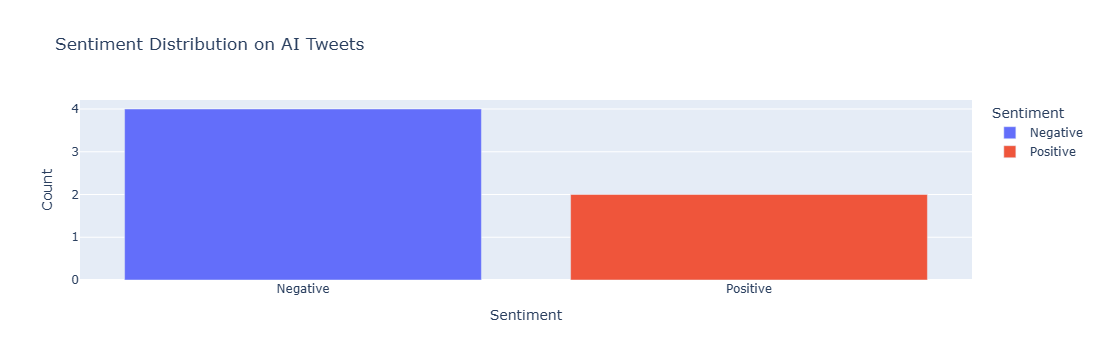

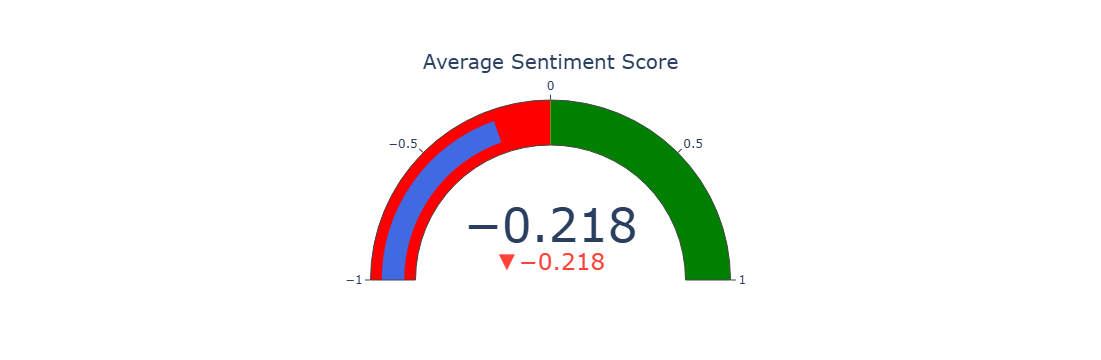

In [48]:
import plotly.graph_objects as go
import plotly.express as px

# Prepare sentiment counts
sentiment_counts = df['Sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']  # rename columns properly

# 1️⃣ Bar chart for sentiment distribution
fig_bar = px.bar(sentiment_counts,
                 x='Sentiment', y='Count',
                 title='Sentiment Distribution on AI Tweets',
                 color='Sentiment')

fig_bar.show()

# 2️⃣ Gauge chart for average sentiment
avg_score = df['Score'].mean()

fig_gauge = go.Figure(go.Indicator(
    mode="gauge+number+delta",
    value=avg_score,
    title={'text': "Average Sentiment Score"},
    gauge={'axis': {'range': [-1, 1]},
           'bar': {'color': "royalblue"},
           'steps': [
               {'range': [-1, 0], 'color': "red"},
               {'range': [0, 1], 'color': "green"}]},
    delta={'reference': 0}
))

fig_gauge.show()


In [49]:
print(df['Sentiment'].value_counts())


Sentiment
Negative    4
Positive    2
Name: count, dtype: int64


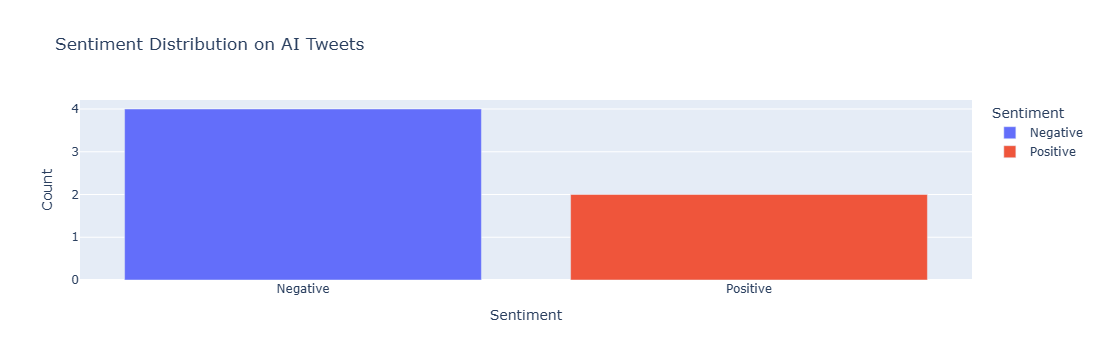

In [50]:
sentiment_counts = df['Sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

fig_bar = px.bar(sentiment_counts,
                 x='Sentiment', y='Count',
                 title='Sentiment Distribution on AI Tweets',
                 color='Sentiment')

fig_bar.show()


In [51]:
print(df['Score'].min(), df['Score'].max())
print(df['Score'])


-1.0 0.7500000000000001
0    0.750000
1   -1.000000
2   -0.525000
3   -0.157955
4   -1.000000
5    0.625000
Name: Score, dtype: float64


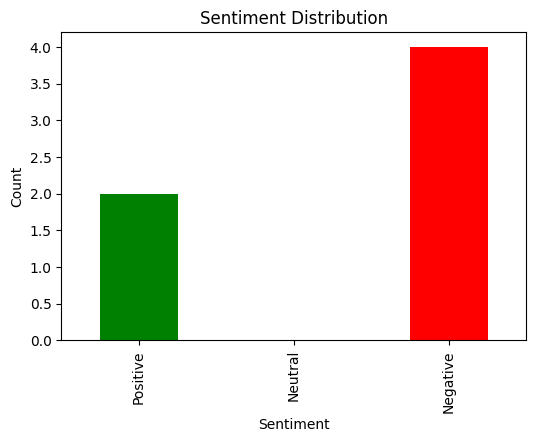

In [52]:
import matplotlib.pyplot as plt

# Ensure all three sentiment categories appear
sentiment_counts = df['Sentiment'].value_counts().reindex(['Positive', 'Neutral', 'Negative'], fill_value=0)

plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar', color=['green', 'grey', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


Sentiment
Positive    5
Negative    4
Name: count, dtype: int64


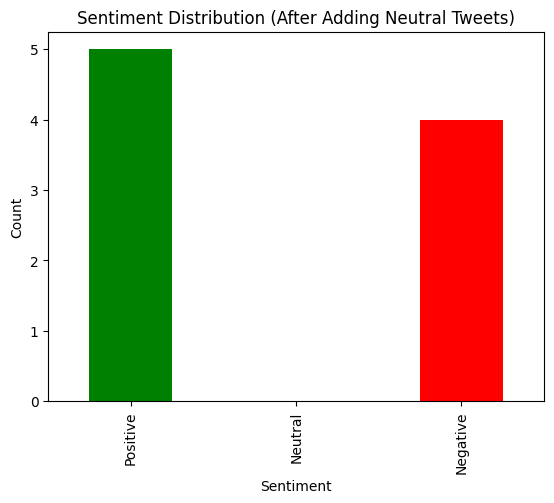

In [53]:
neutral_tweets = pd.DataFrame({
    'Tweet': [
        'AI is becoming more common nowadays.',
        'Many companies are researching AI.',
        'AI plays an important role in modern life.'
    ]
})

# Calculate polarity for new neutral tweets
neutral_tweets['Score'] = neutral_tweets['Tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)

def get_sentiment(x):
    if x > 0.2:
        return 'Positive'
    elif x < -0.2:
        return 'Negative'
    else:
        return 'Neutral'

neutral_tweets['Sentiment'] = neutral_tweets['Score'].apply(get_sentiment)

# Merge with your main DataFrame
df = pd.concat([df, neutral_tweets], ignore_index=True)

# Verify counts
print(df['Sentiment'].value_counts())

# Plot again
sentiment_counts = df['Sentiment'].value_counts().reindex(['Positive', 'Neutral', 'Negative'], fill_value=0)
sentiment_counts.plot(kind='bar', color=['green', 'grey', 'red'])
plt.title('Sentiment Distribution (After Adding Neutral Tweets)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


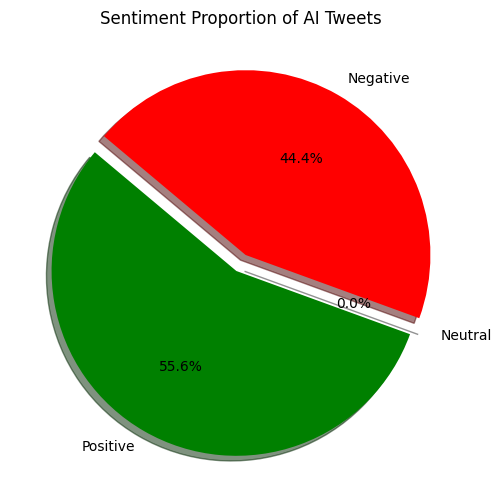

In [54]:
import matplotlib.pyplot as plt

# Count each sentiment type (ensuring all categories are represented)
sentiment_counts = df['Sentiment'].value_counts().reindex(['Positive', 'Neutral', 'Negative'], fill_value=0)

# Define colors for each sentiment
colors = ['green', 'grey', 'red']

# Create the pie chart
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, 
        labels=sentiment_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors, 
        explode=(0.05, 0.05, 0.05),  # slight separation
        shadow=True)

plt.title('Sentiment Proportion of AI Tweets')
plt.show()


In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Convert 'created_at' to datetime if available
if 'created_at' in df.columns:
    df['created_at'] = pd.to_datetime(df['created_at'])
    
    # Group by date and calculate average sentiment score
    df['Date'] = df['created_at'].dt.date
    daily_sentiment = df.groupby('Date')['Score'].mean().reset_index()

    # Plot line chart
    plt.figure(figsize=(8,5))
    plt.plot(daily_sentiment['Date'], daily_sentiment['Score'], marker='o', color='blue')
    plt.title('Daily Average Sentiment Score Over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Sentiment Score')
    plt.grid(True)
    plt.show()
else:
    print("⚠️ No 'created_at' column found in your dataset, so trend over time cannot be plotted.")


⚠️ No 'created_at' column found in your dataset, so trend over time cannot be plotted.


In [56]:
# 7.2 Display Top Positive and Negative Tweets

# Sort by sentiment score
top_positive = df.sort_values(by='Score', ascending=False).head(3)
top_negative = df.sort_values(by='Score', ascending=True).head(3)

print("💚 Top Positive Tweets:")
for i, row in top_positive.iterrows():
    print(f"- {row['Tweet']} (Score: {row['Score']:.2f})")

print("\n💢 Top Negative Tweets:")
for i, row in top_negative.iterrows():
    print(f"- {row['Tweet']} (Score: {row['Score']:.2f})")


💚 Top Positive Tweets:
- AI is amazing and helps humanity grow! (Score: 0.75)
- I love how AI makes everything faster! (Score: 0.62)
- Many companies are researching AI. (Score: 0.50)

💢 Top Negative Tweets:
- I hate how AI is replacing jobs! (Score: -1.00)
- AI technology is terrible when misused! (Score: -1.00)
- AI is just a tool, not good or bad. (Score: -0.52)


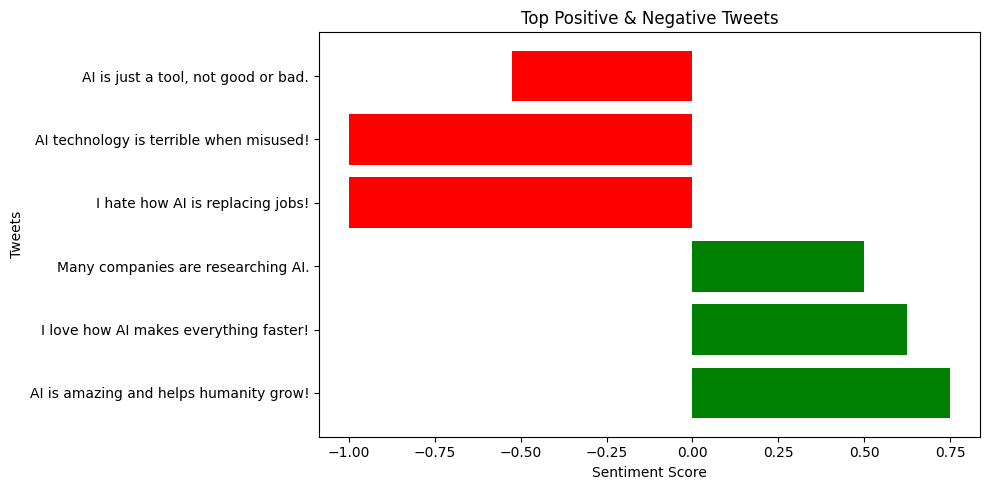

In [57]:
# 7.3 Visualize Top Positive & Negative Tweets

import matplotlib.pyplot as plt

# Select top 3 positive and negative tweets
top_pos = df.sort_values(by='Score', ascending=False).head(3)
top_neg = df.sort_values(by='Score', ascending=True).head(3)

# Combine them for plotting
top_combined = pd.concat([top_pos, top_neg])

# Create the bar plot
plt.figure(figsize=(10,5))
plt.barh(top_combined['Tweet'], top_combined['Score'], color=['green' if s > 0 else 'red' for s in top_combined['Score']])
plt.xlabel('Sentiment Score')
plt.ylabel('Tweets')
plt.title('Top Positive & Negative Tweets')
plt.tight_layout()
plt.show()


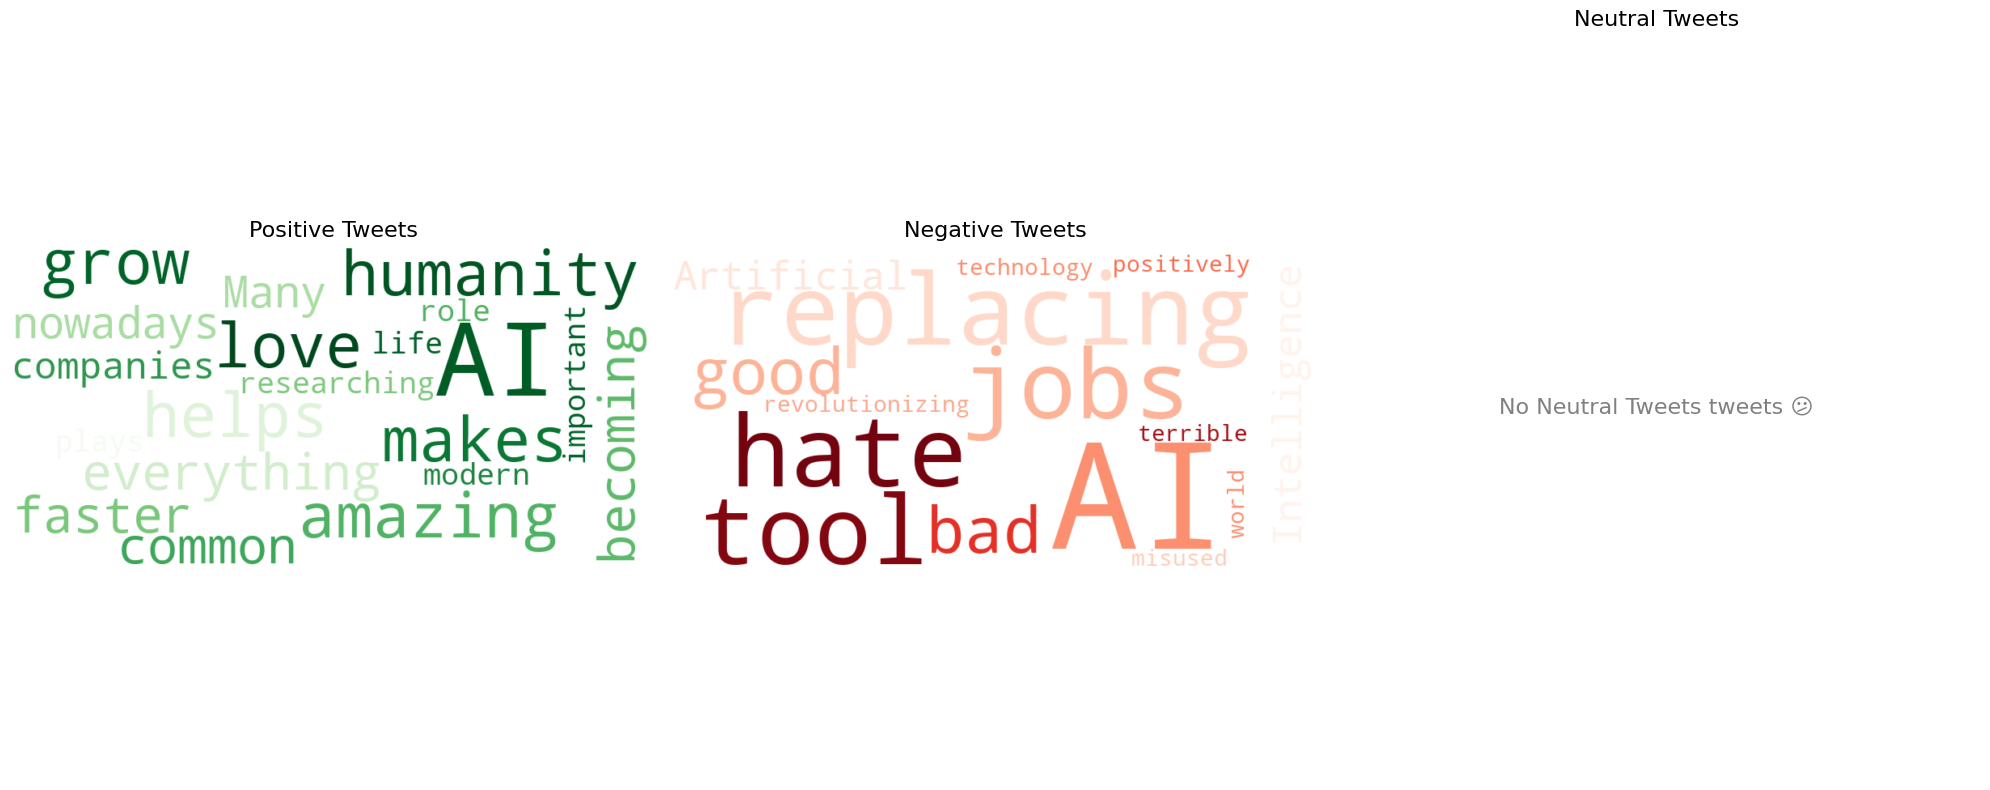

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate tweets by sentiment
positive_text = " ".join(df[df['Sentiment'] == 'Positive']['Tweet'])
negative_text = " ".join(df[df['Sentiment'] == 'Negative']['Tweet'])
neutral_text  = " ".join(df[df['Sentiment'] == 'Neutral']['Tweet'])

# Create figure
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

# Function to safely create wordcloud
def create_cloud(ax, text, title, cmap):
    if text.strip():  # only create if there’s text
        wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=cmap).generate(text)
        ax.imshow(wordcloud, interpolation='bilinear')
    else:
        ax.text(0.5, 0.5, f"No {title} tweets 😕", ha='center', va='center', fontsize=16, color='gray')
    ax.set_title(title, fontsize=16)
    ax.axis('off')

# Generate for each sentiment
create_cloud(axs[0], positive_text, 'Positive Tweets', 'Greens')
create_cloud(axs[1], negative_text, 'Negative Tweets', 'Reds')
create_cloud(axs[2], neutral_text,  'Neutral Tweets',  'gray')

plt.tight_layout()
plt.show()


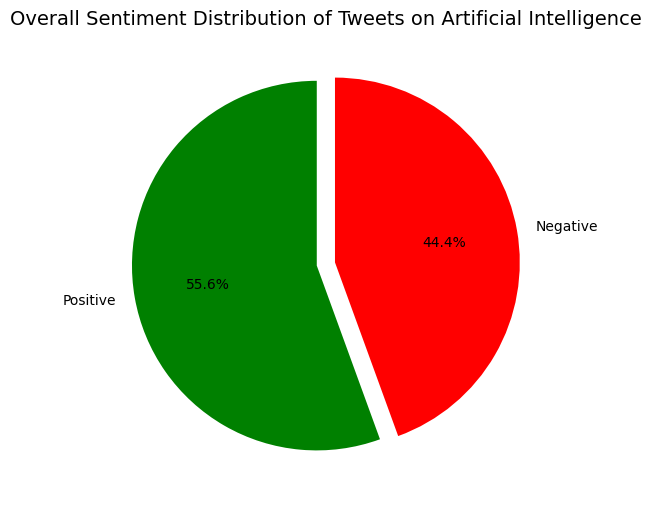

In [61]:
import matplotlib.pyplot as plt

# Count tweets per sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Define colors (only as many as needed)
colors = ['green', 'red', 'gray'][:len(sentiment_counts)]

# Dynamically set explode size for each sentiment
explode = [0.05] * len(sentiment_counts)

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts,
        labels=sentiment_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        explode=explode)

plt.title("Overall Sentiment Distribution of Tweets on Artificial Intelligence", fontsize=14)
plt.show()


In [62]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ---------- Create WordClouds ----------
positive_text = " ".join(df[df['Sentiment'] == 'Positive']['Cleaned_Text'])
negative_text = " ".join(df[df['Sentiment'] == 'Negative']['Cleaned_Text'])
neutral_text = " ".join(df[df['Sentiment'] == 'Neutral']['Cleaned_Text']) if 'Neutral' in df['Sentiment'].unique() else ""

wordcloud_pos = WordCloud(width=600, height=300, background_color='white', colormap='Greens').generate(positive_text)
wordcloud_neg = WordCloud(width=600, height=300, background_color='white', colormap='Reds').generate(negative_text)
if neutral_text:
    wordcloud_neu = WordCloud(width=600, height=300, background_color='white', colormap='gray').generate(neutral_text)

# ---------- Create Sentiment Distribution Chart ----------
sentiment_counts = df['Sentiment'].value_counts()
colors = ['green', 'red', 'gray'][:len(sentiment_counts)]
explode = [0.05] * len(sentiment_counts)

# ---------- Create Dashboard ----------
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("AI Sentiment Analysis Dashboard", fontsize=16, weight='bold')

# Pie Chart
axs[0, 0].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
              startangle=90, colors=colors, explode=explode)
axs[0, 0].set_title("Sentiment Distribution", fontsize=13)

# Positive WordCloud
axs[0, 1].imshow(wordcloud_pos, interpolation='bilinear')
axs[0, 1].set_title("Positive Words", fontsize=13)
axs[0, 1].axis("off")

# Negative WordCloud
axs[1, 0].imshow(wordcloud_neg, interpolation='bilinear')
axs[1, 0].set_title("Negative Words", fontsize=13)
axs[1, 0].axis("off")

# Neutral WordCloud (if exists)
if neutral_text:
    axs[1, 1].imshow(wordcloud_neu, interpolation='bilinear')
    axs[1, 1].set_title("Neutral Words", fontsize=13)
    axs[1, 1].axis("off")
else:
    axs[1, 1].text(0.5, 0.5, 'No Neutral Data Available', fontsize=14, ha='center', va='center')
    axs[1, 1].axis("off")

plt.tight_layout()
plt.subplots_adjust(top=0.9)

# ---------- Save the Dashboard ----------
plt.savefig("AI_Sentiment_Analysis_Dashboard.png", dpi=300)
plt.show()

print("✅ Dashboard created and saved as 'AI_Sentiment_Analysis_Dashboard.png'")


KeyError: 'Cleaned_Text'

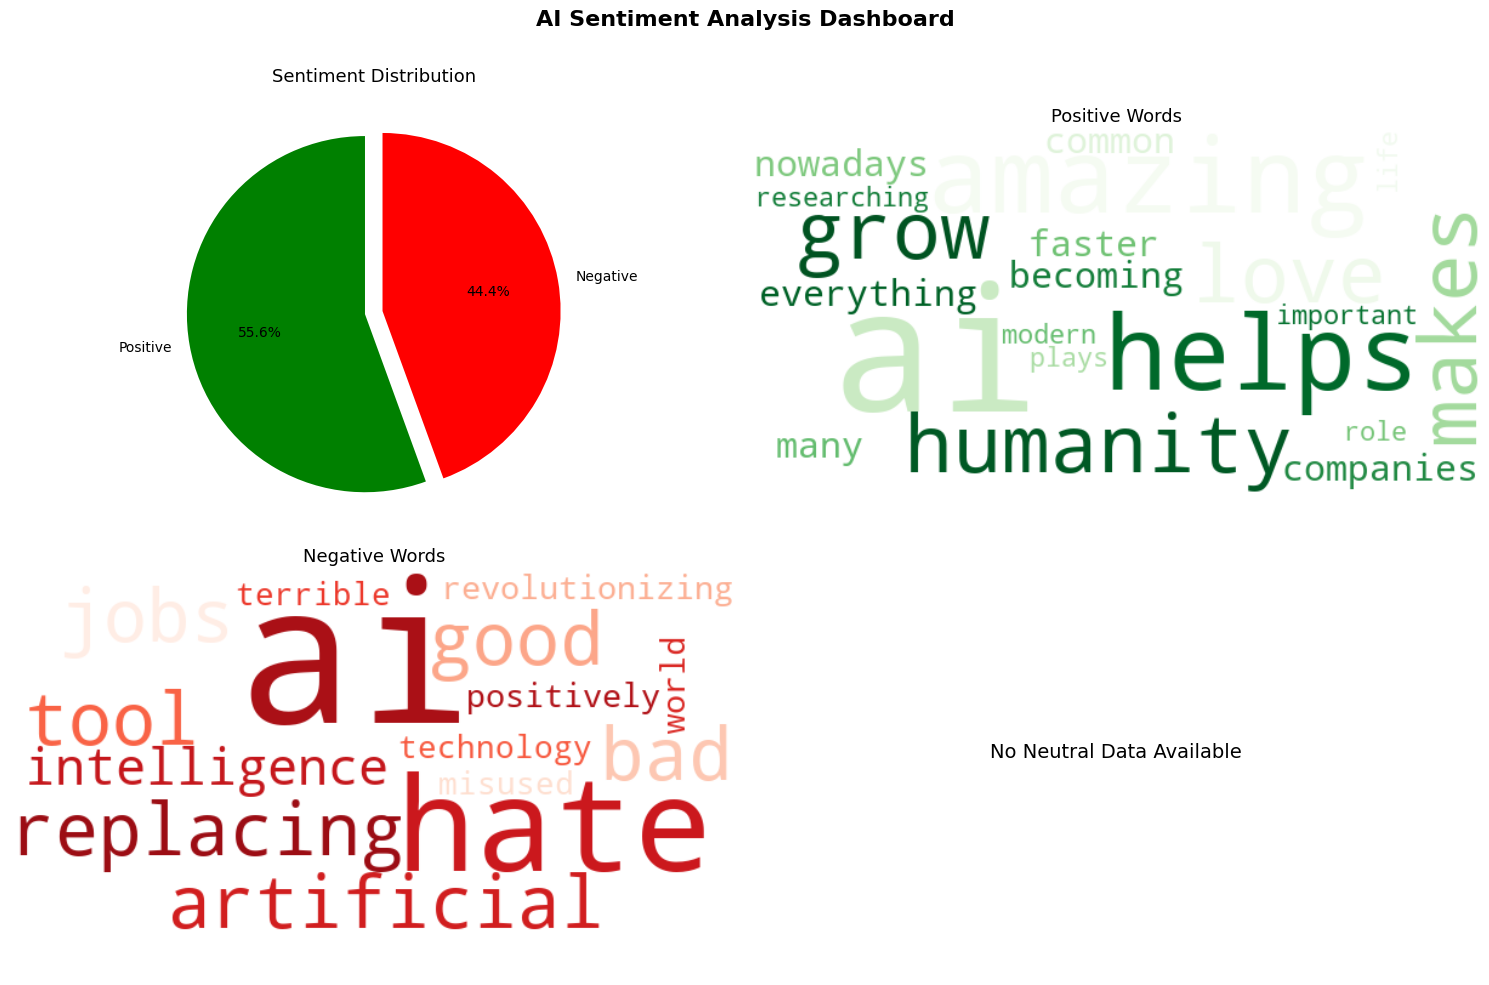

✅ Dashboard created and saved as 'AI_Sentiment_Analysis_Dashboard.png'


In [63]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

# ---------- Clean tweets for word cloud ----------
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove links
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove punctuation/numbers
    text = text.lower().strip()
    return text

df['Cleaned_Tweet'] = df['Tweet'].apply(clean_text)

# ---------- Create WordClouds ----------
positive_text = " ".join(df[df['Sentiment'] == 'Positive']['Cleaned_Tweet'])
negative_text = " ".join(df[df['Sentiment'] == 'Negative']['Cleaned_Tweet'])
neutral_text = " ".join(df[df['Sentiment'] == 'Neutral']['Cleaned_Tweet']) if 'Neutral' in df['Sentiment'].unique() else ""

wordcloud_pos = WordCloud(width=600, height=300, background_color='white', colormap='Greens').generate(positive_text)
wordcloud_neg = WordCloud(width=600, height=300, background_color='white', colormap='Reds').generate(negative_text)
if neutral_text:
    wordcloud_neu = WordCloud(width=600, height=300, background_color='white', colormap='gray').generate(neutral_text)

# ---------- Create Sentiment Distribution Chart ----------
sentiment_counts = df['Sentiment'].value_counts()
colors = ['green', 'red', 'gray'][:len(sentiment_counts)]
explode = [0.05] * len(sentiment_counts)

# ---------- Create Dashboard ----------
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("AI Sentiment Analysis Dashboard", fontsize=16, weight='bold')

# Pie Chart
axs[0, 0].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
              startangle=90, colors=colors, explode=explode)
axs[0, 0].set_title("Sentiment Distribution", fontsize=13)

# Positive WordCloud
axs[0, 1].imshow(wordcloud_pos, interpolation='bilinear')
axs[0, 1].set_title("Positive Words", fontsize=13)
axs[0, 1].axis("off")

# Negative WordCloud
axs[1, 0].imshow(wordcloud_neg, interpolation='bilinear')
axs[1, 0].set_title("Negative Words", fontsize=13)
axs[1, 0].axis("off")

# Neutral WordCloud (if exists)
if neutral_text:
    axs[1, 1].imshow(wordcloud_neu, interpolation='bilinear')
    axs[1, 1].set_title("Neutral Words", fontsize=13)
    axs[1, 1].axis("off")
else:
    axs[1, 1].text(0.5, 0.5, 'No Neutral Data Available', fontsize=14, ha='center', va='center')
    axs[1, 1].axis("off")

plt.tight_layout()
plt.subplots_adjust(top=0.9)

# ---------- Save the Dashboard ----------
plt.savefig("AI_Sentiment_Analysis_Dashboard.png", dpi=300)
plt.show()

print("✅ Dashboard created and saved as 'AI_Sentiment_Analysis_Dashboard.png'")
